In [1]:
%run "C:\Users\neoSTORM6\Documents\imageAnalysis3\required_files\Startup_py3.py"
sys.path.append(r"C:\Users\neoSTORM6\Documents")

#import imageAnalysis3 as ia
%matplotlib notebook

#from imageAnalysis3 import *
print(os.getpid())

71348


In [2]:
from ChromAn import src

In [69]:
from ChromAn.src.file_io.dax_process import DaxProcesser
from ChromAn.src.visual_tools.interactive import imshow_mark_3d

In [143]:
image_folder = r'D:\Pu\20230618-PFAFix_preEdit_4T1\Tests'
#image_folder = r'\\10.245.74.212\Chromatin_NAS_2\Pu\20230724-4T1cell_0712_30k_full\MeAA\H8M9'
image_basenames = sorted([_fl for _fl in os.listdir(image_folder) if _fl.split(os.extsep)[-1] =='dax'])
print(image_folder)
print(image_basenames)

D:\Pu\20230618-PFAFix_preEdit_4T1\Tests
['zscan_750_647_561_488_405_s30_n500_0001.dax', 'zscan_750_647_561_488_405_s30_n500_0002.dax', 'zscan_750_647_561_488_405_s30_n500_0003.dax', 'zscan_750_647_561_488_405_s30_n500_0004.dax', 'zscan_750_647_561_488_405_s30_n500_0005.dax', 'zscan_750_647_561_488_405_s30_n500_0006.dax']


In [144]:
image_filename = os.path.join(image_folder, image_basenames[-1])
print(image_filename)
# load image
daxp = DaxProcesser(image_filename,
                    CorrectionFolder=r'\\KOLMOGOROV\Chromatin_NAS_0\Corrections\20210621-Corrections_lumencor_from_60_to_50' )
daxp._load_image()
# corrections
#daxp._corr_illumination()
#daxp._corr_bleedthrough()
#daxp._corr_hot_pixels()

D:\Pu\20230618-PFAFix_preEdit_4T1\Tests\zscan_750_647_561_488_405_s30_n500_0006.dax
Initialize DaxProcesser for file:D:\Pu\20230618-PFAFix_preEdit_4T1\Tests\zscan_750_647_561_488_405_s30_n500_0006.dax
- New save file: D:\Pu\20230618-PFAFix_preEdit_4T1\Tests\zscan_750_647_561_488_405_s30_n500_0006_processed.hdf5
-- all used channels: ['750', '647', '561', '488', '405']
-- single image size: [  30 2048 2048]
- Loaded images for channels:['750', '647', '561', '488', '405'] in 3.205s.


<IPython.core.display.Javascript object>


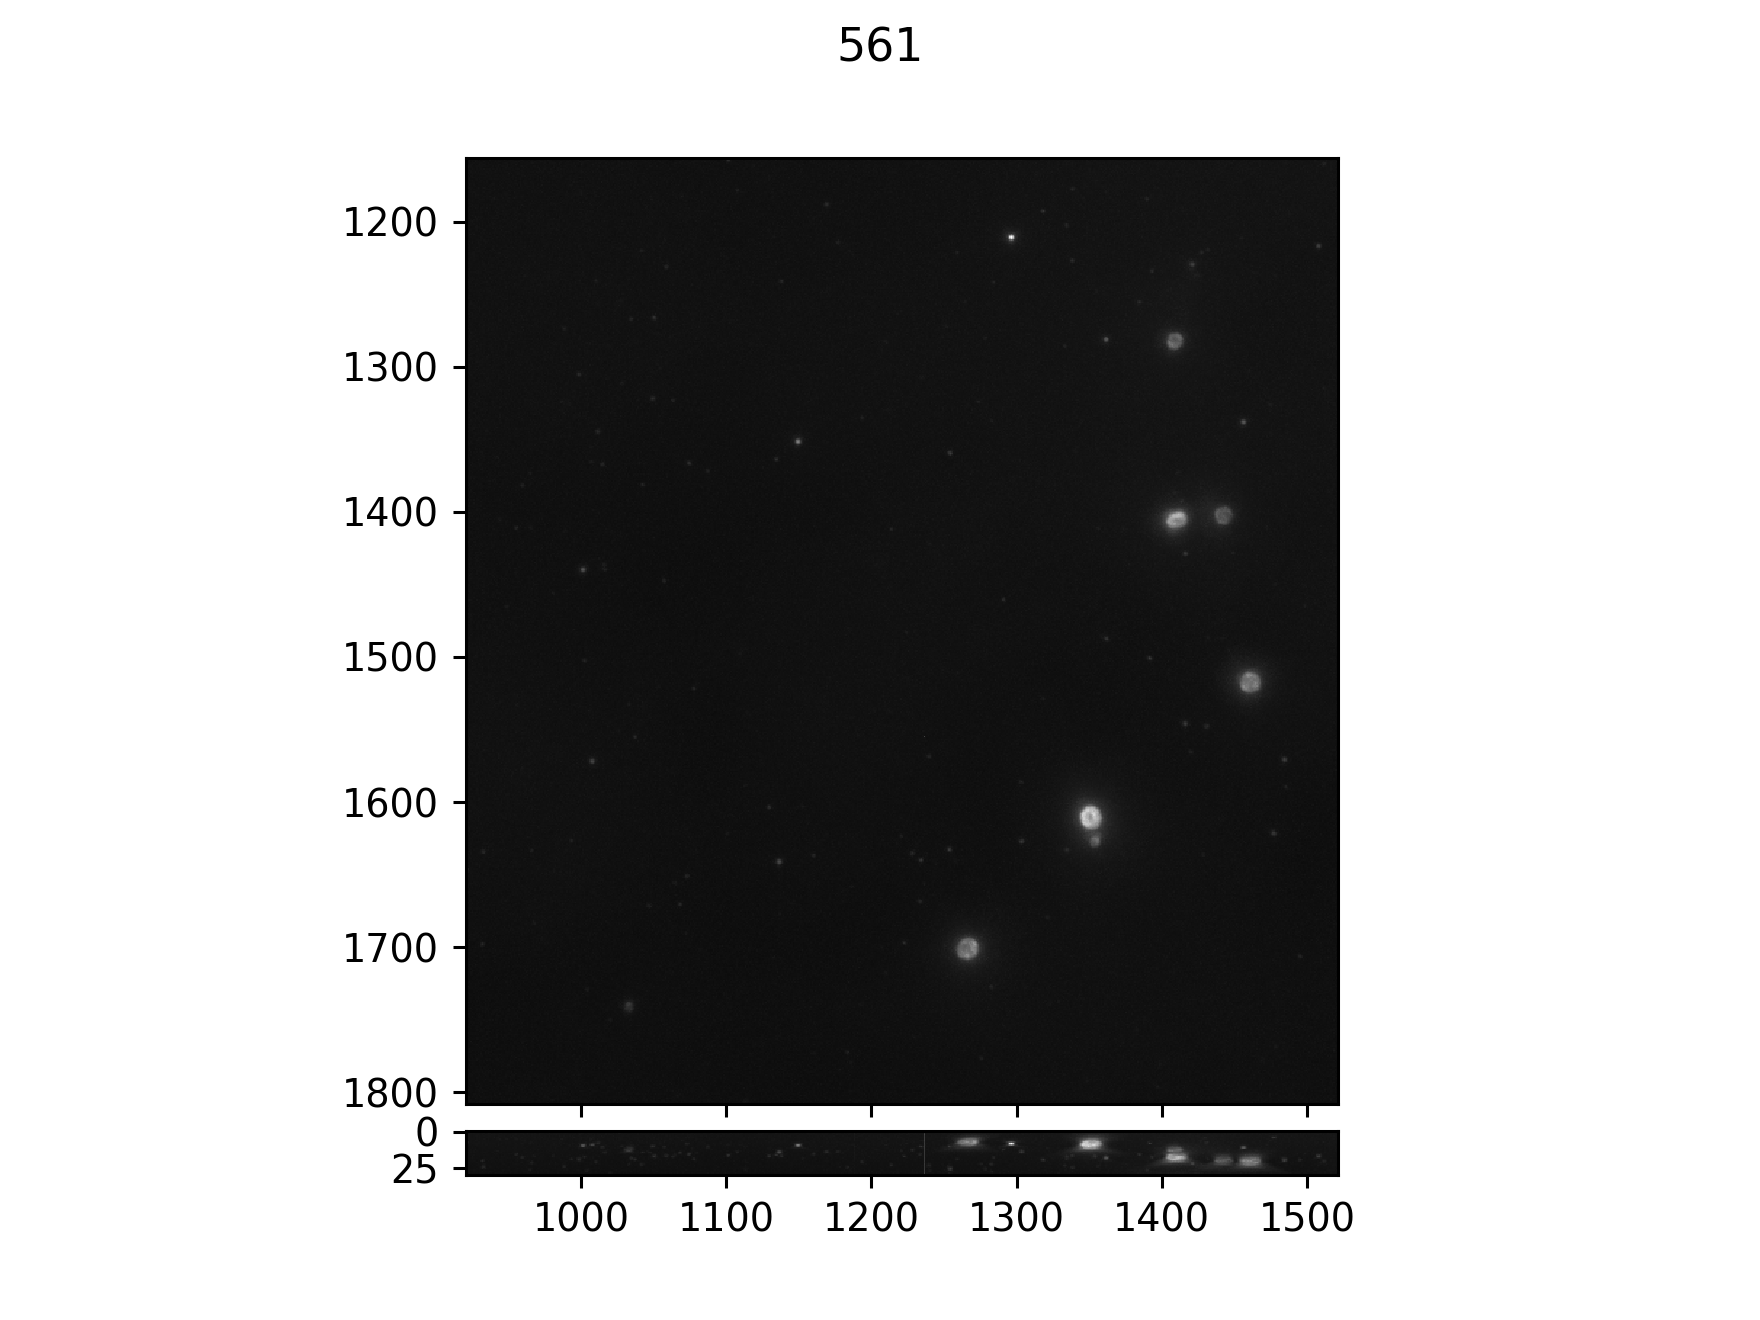

In [145]:
%matplotlib notebook
f = plt.figure(dpi=125)
imshow_mark_3d([getattr(daxp, f"im_{_ch}") for _ch in daxp.channels], 
                fig=f,
                image_names=daxp.channels, 
                min_max_default=[1000,10000],
                )

In [94]:
ref_image_folder = r'\\10.245.74.212\Chromatin_NAS_2\Pu\20230724-4T1cell_0712_30k_full\MeAA\H0M1'
ref_image_basenames = image_basenames #= sorted([_fl for _fl in os.listdir(image_folder) if _fl.split(os.extsep)[-1] =='dax'])
print(image_folder)
#print(image_basenames)
ref_image_filename = os.path.join(ref_image_folder, os.path.basename(image_filename))
print(ref_image_filename)
# load image
ref_daxp = DaxProcesser(ref_image_filename,
                    CorrectionFolder=r'\\KOLMOGOROV\Chromatin_NAS_0\Corrections\20210621-Corrections_lumencor_from_60_to_50' )
ref_daxp._load_image()
# corrections
#daxp._corr_illumination()
#daxp._corr_hot_pixels()

\\10.245.74.212\Chromatin_NAS_2\Pu\20230724-4T1cell_0712_30k_full\MeAA\H8M9
\\10.245.74.212\Chromatin_NAS_2\Pu\20230724-4T1cell_0712_30k_full\MeAA\H0M1\Conv_zscan_021.dax
Initialize DaxProcesser for file:\\10.245.74.212\Chromatin_NAS_2\Pu\20230724-4T1cell_0712_30k_full\MeAA\H0M1\Conv_zscan_021.dax
- New save file: \\10.245.74.212\Chromatin_NAS_2\Pu\20230724-4T1cell_0712_30k_full\MeAA\H0M1\Conv_zscan_021_processed.hdf5
-- all used channels: ['750', '647', '561', '488', '405']
-- single image size: [  40 2048 2048]
- Loaded images for channels:['750', '647', '561', '488', '405'] in 6.105s.


<IPython.core.display.Javascript object>


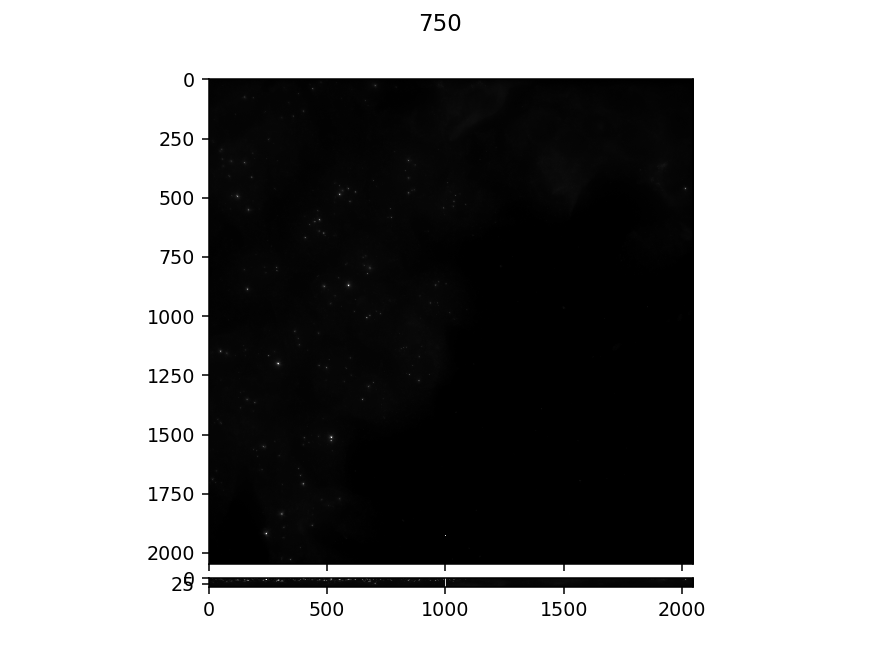

In [96]:
%matplotlib notebook
f = plt.figure(dpi=125)
imshow_mark_3d([getattr(ref_daxp, f"im_{_ch}") for _ch in daxp.channels], 
                fig=f,
                image_names=ref_daxp.channels, 
                min_max_default=[1000,10000],
                )

<IPython.core.display.Javascript object>


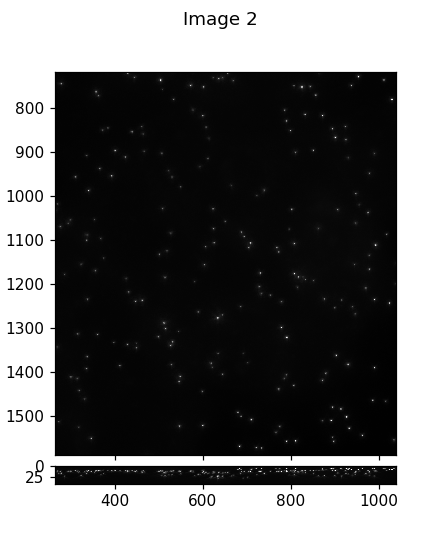

In [98]:
imshow_mark_3d([ref_daxp.im_488, daxp.im_488])

<IPython.core.display.Javascript object>


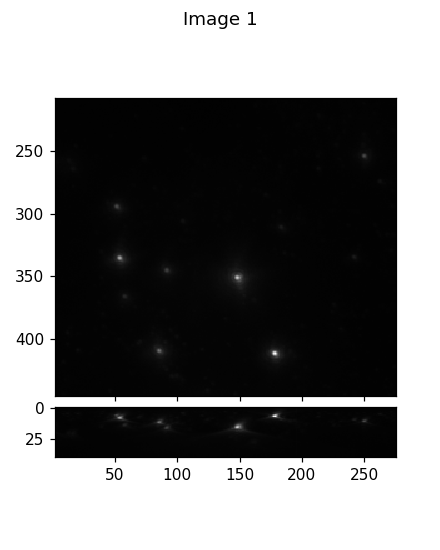

In [102]:
imshow_mark_3d([ref_daxp.im_647, daxp.im_561, daxp.im_647])

<IPython.core.display.Javascript object>


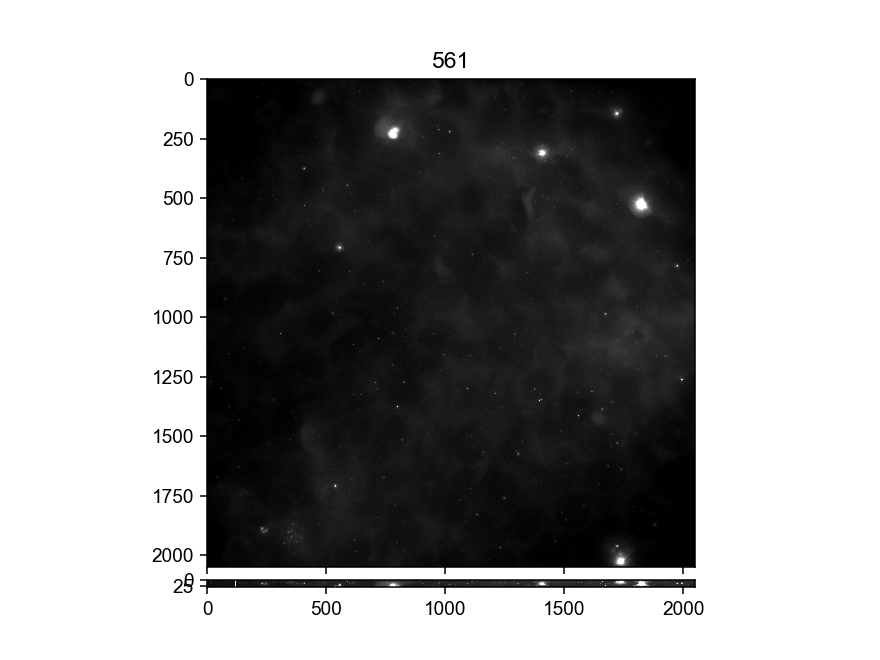

In [267]:
%matplotlib notebook
f = plt.figure(dpi=125)
ia.visual_tools.imshow_mark_3d_v2([getattr(ref_daxp, f"im_{_ch}") for _ch in ref_daxp.channels], 
                                  fig=f,
                                  image_names=ref_daxp.channels, 
                                  min_max_default=[2000,20000],
                                 )

<IPython.core.display.Javascript object>


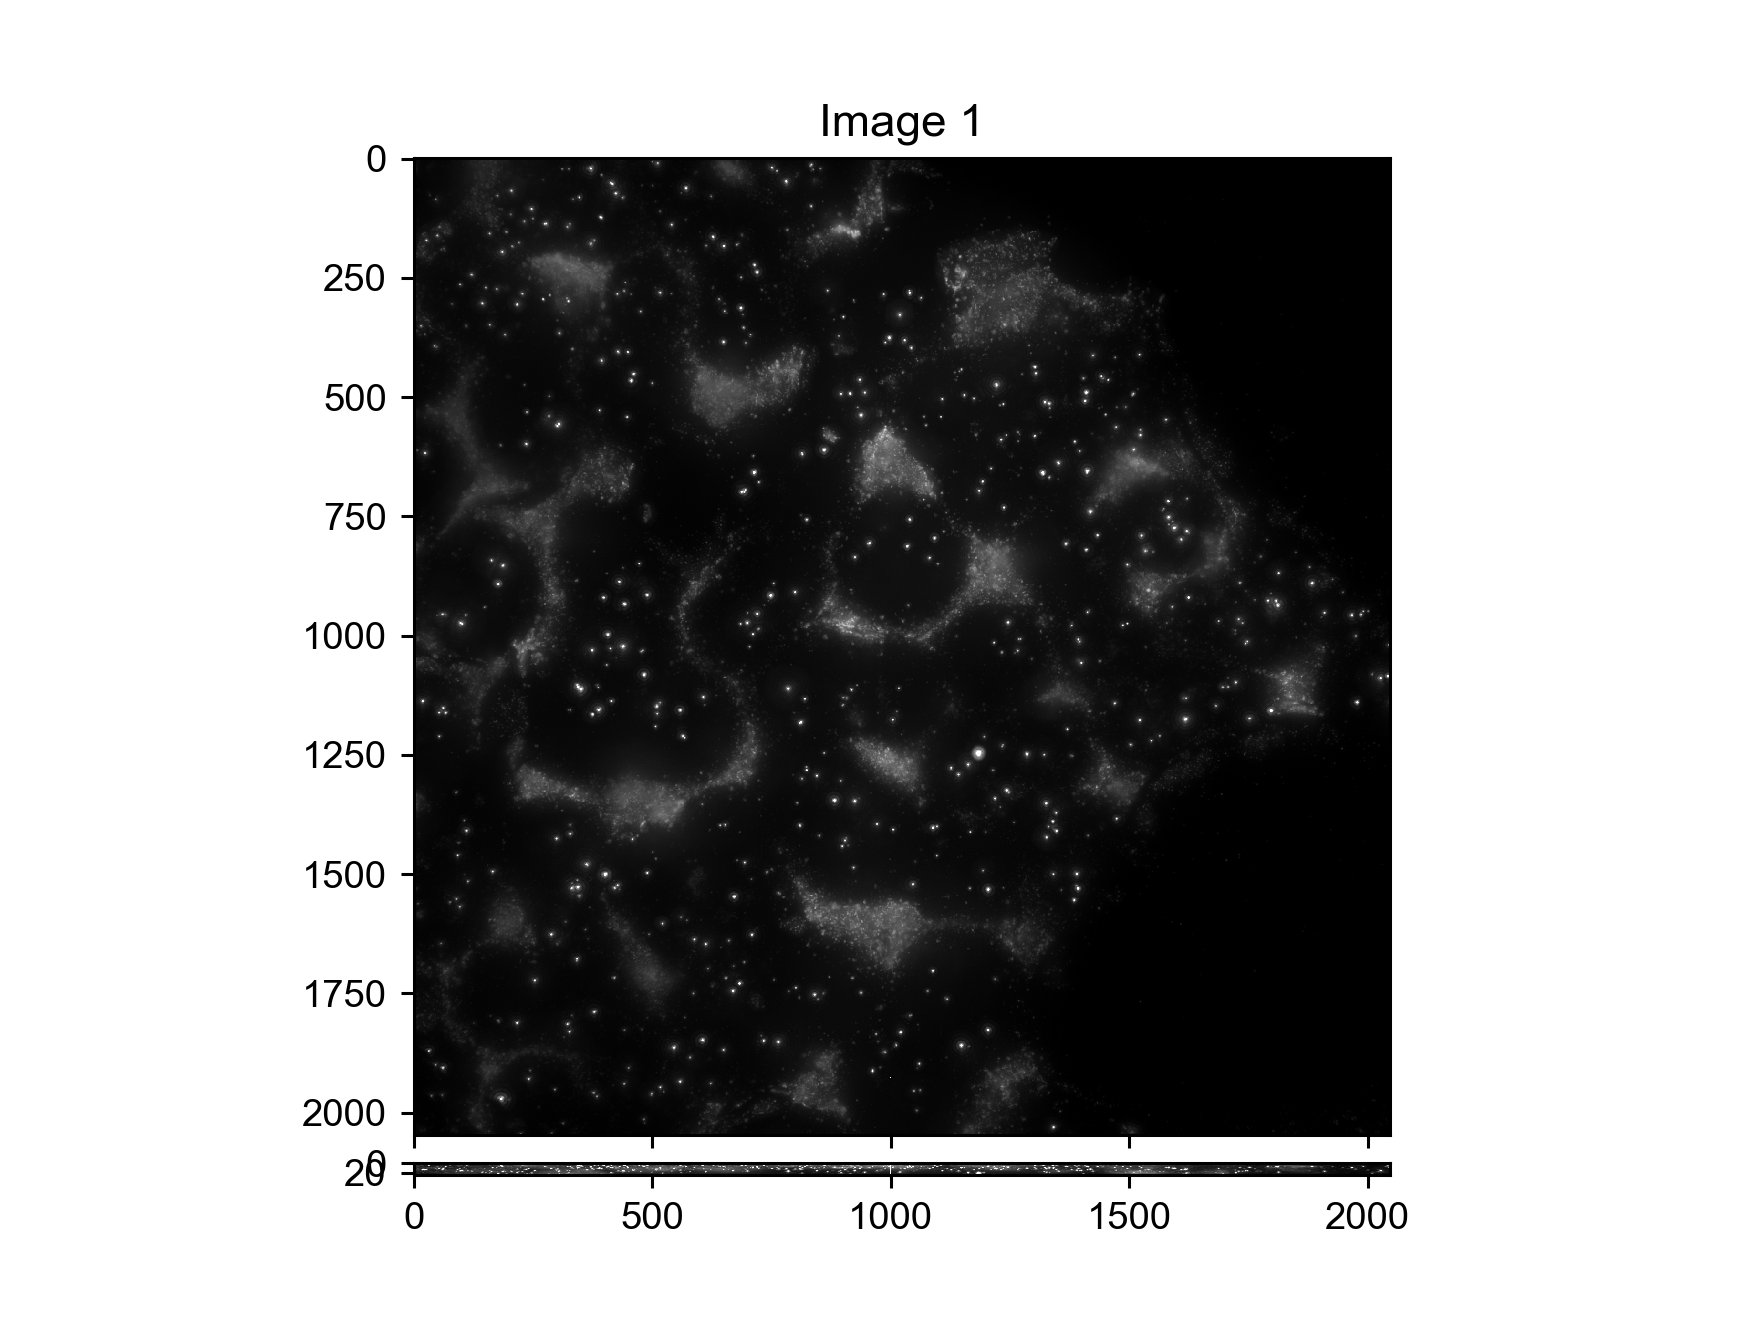

In [231]:
%matplotlib notebook
f = plt.figure(dpi=125)
ia.visual_tools.imshow_mark_3d_v2([daxp.im_488,daxp.im_561, daxp.im_405], 
                                  fig=f,
                                  #image_names=daxp.channels, 
                                  min_max_default=[2000,20000],
                                 )

# Ref image

In [198]:
ref_image_filename = r'\\10.245.74.212\Chromatin_NAS_2\Pu\20230510-4T1_edits_11k_ns\H0M1\Conv_zscan_125.dax'
print(ref_image_filename)

ref_im = ia.visual_tools.batch_load_dax(ref_image_filename)

#split by channel
image_channels = [750,488,561,488,405]
splitted_ref_ims = ia.io_tools.load.split_im_by_channels(ref_im, 
                                                      image_channels,
                                                      image_channels,
                                                      num_buffer_frames=0, 
                                                      single_im_size=[50,2048,2048])

\\10.245.74.212\Chromatin_NAS_2\Pu\20230510-4T1_edits_11k_ns\H0M1\Conv_zscan_125.dax


<IPython.core.display.Javascript object>


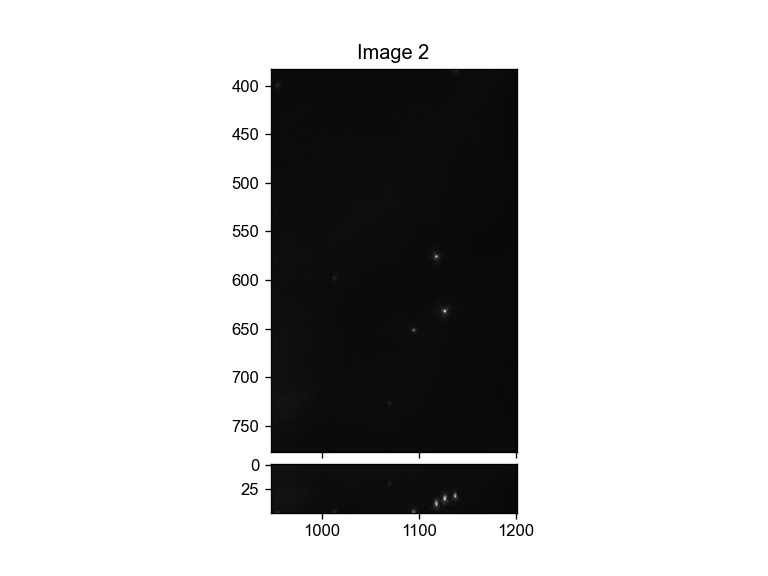

In [212]:
%matplotlib notebook
f = plt.figure(dpi=120)
ia.visual_tools.imshow_mark_3d_v2([splitted_ims1[-1],splitted_ref_ims[-2]], fig=f,
                                  #image_names=image_channels, 
                                  min_max_default=[100,5000],
                                 )

<IPython.core.display.Javascript object>


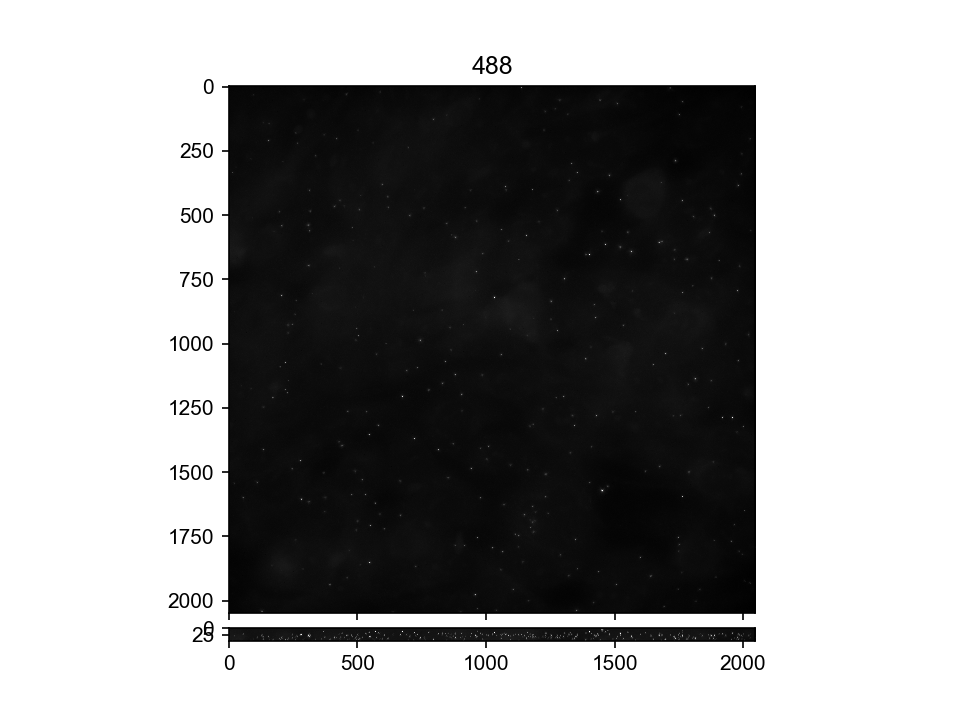

In [145]:
%matplotlib notebook
f = plt.figure(dpi=150)
ia.visual_tools.imshow_mark_3d_v2(splitted_ref_ims, fig=f,
                                  image_names=image_channels, min_max_default=[1000,30000])

In [211]:
%matplotlib notebook
ia.visual_tools.imshow_mark_3d_v2([splitted_ims1[-2], splitted_ims2[-2]], )

NameError: name 'splitted_ims2' is not defined